In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [29]:
from utiles.utilities import load_data

df = load_data("../dataset/credit_card_fraud_10k.csv")

In [30]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [32]:
df['merchant_category'].unique()

array(['Electronics', 'Travel', 'Grocery', 'Food', 'Clothing'],
      dtype=object)

In [33]:
print(f"Duplicate : {df.duplicated().sum()} duplicate(s) \n") 
print(f"Nullvalues : {df.isna().sum()} null value(s) \n") 

Duplicate : 0 duplicate(s) 

Nullvalues : transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64 null value(s) 



## dataset already clean , no missing values , no duplicate

In [34]:
df.loc[df['amount'] == 0 ]

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
2902,2903,0.0,16,Travel,0,0,72,1,23,0


In [38]:
df['foreign_transaction'].unique()

array([0, 1])

In [39]:
df['location_mismatch'].unique()

array([0, 1])

## 1 record with 0 transaction amount ; possibly free trial or card verification 

In [35]:
fraud_count = df['is_fraud'].value_counts()
fraud_count

is_fraud
0    9849
1     151
Name: count, dtype: int64

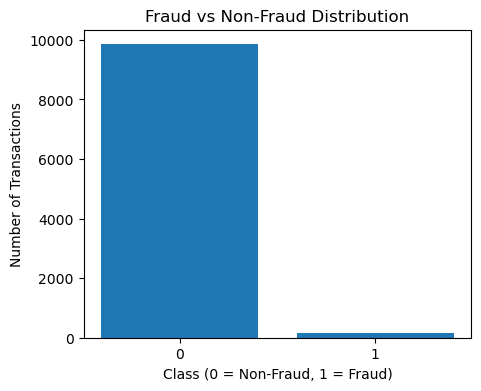

In [36]:
plt.figure(figsize=(5, 4))
plt.bar(fraud_count.index, fraud_count.values)
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.title("Fraud vs Non-Fraud Distribution")
plt.xticks([0, 1])
plt.show()

## imbalanced classes

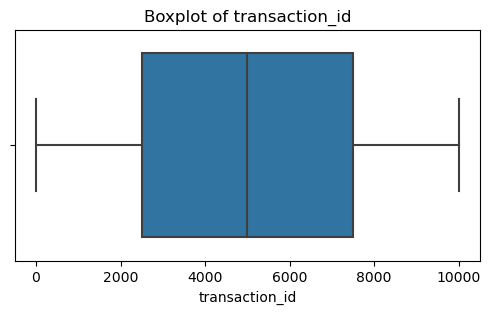

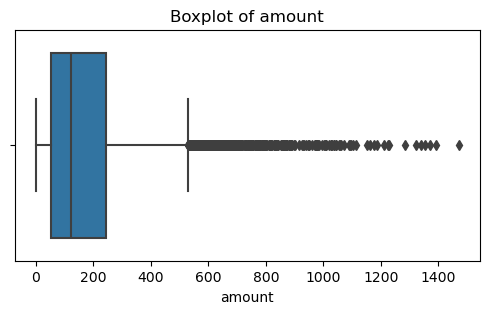

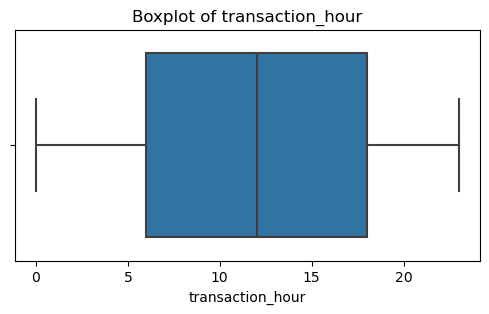

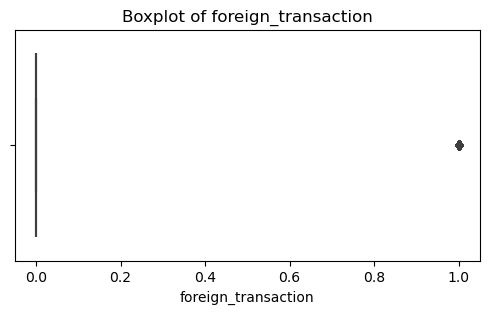

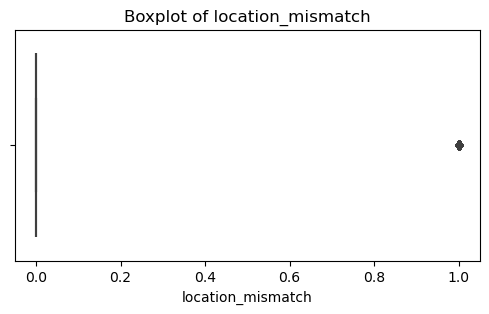

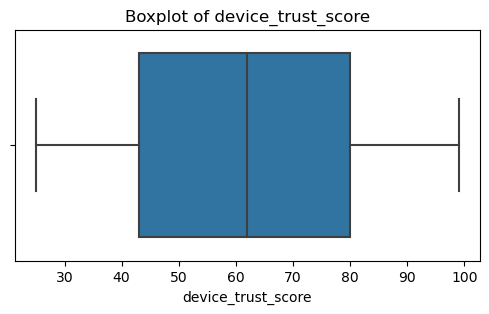

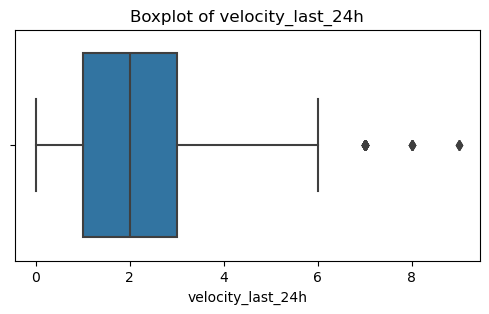

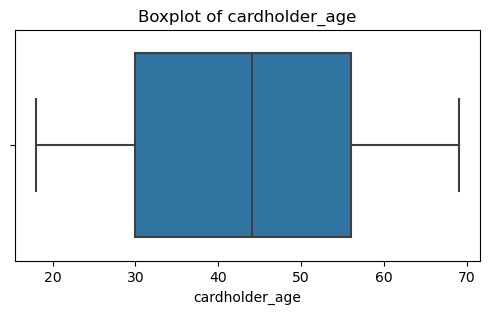

In [37]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols = num_cols.drop('is_fraud')

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


## NO OUTLIERS